In [46]:
#계절별로 어느국가가 많이 방문하는지 알아보기위한 앱, 클러스터링

In [47]:
#데이터 로드
import pandas as pd
df=pd.read_csv('data/prophet_df.csv')

In [48]:
#월을 계절로 변환하는 함수
def get_season(month):
    if month in [3, 4, 5]:
        return "봄"
    elif month in [6, 7, 8]:
        return "여름"
    elif month in [9, 10, 11]:
        return "가을"
    else:
        return "겨울"

In [49]:
# 데이터 전처리
df['연도'] = df['방문년월'].astype(str).str[:4].astype(int)
df['월'] = df['방문년월'].astype(str).str[4:].astype(int)
df['계절'] = df['월'].apply(get_season)

In [50]:
df

,국적지역,방문년월,입국자수,연도,월,계절
0,그리스,202501,807,2025,1,겨울
1,그리스,202502,979,2025,2,겨울
2,그리스,202503,1143,2025,3,봄
3,그리스,202504,1268,2025,4,봄
4,그리스,202505,1029,2025,5,봄
...,...,...,...,...,...,...
1913,홍콩,202608,92514,2026,8,여름
1914,홍콩,202609,99970,2026,9,가을
1915,홍콩,202610,109266,2026,10,가을
1916,홍콩,202611,117038,2026,11,가을


In [51]:
seasonal_df = df.groupby(['국적지역', '계절'])['입국자수'].sum().unstack(fill_value=0)

In [52]:
seasonal_df

계절,가을,겨울,봄,여름
국적지역,,,,
그리스,7687,6658,7507,8051
나이지리아,1364,1447,1025,1678
남아프리카공화국,11830,11354,11124,12755
네덜란드,43772,33398,42065,47566
네팔,21484,27121,20390,30945
...,...,...,...,...
프랑스,140070,105701,136372,140656
핀란드,10791,10055,10734,11731
필리핀,404779,359889,366033,378967


In [53]:
seasonal_df.to_csv('data/seasonal_df.csv', index=True)

In [54]:
seasonal_df.columns

Index(['가을', '겨울', '봄', '여름'], dtype='object', name='계절')

In [55]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스에서 한글 폰트 사용

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


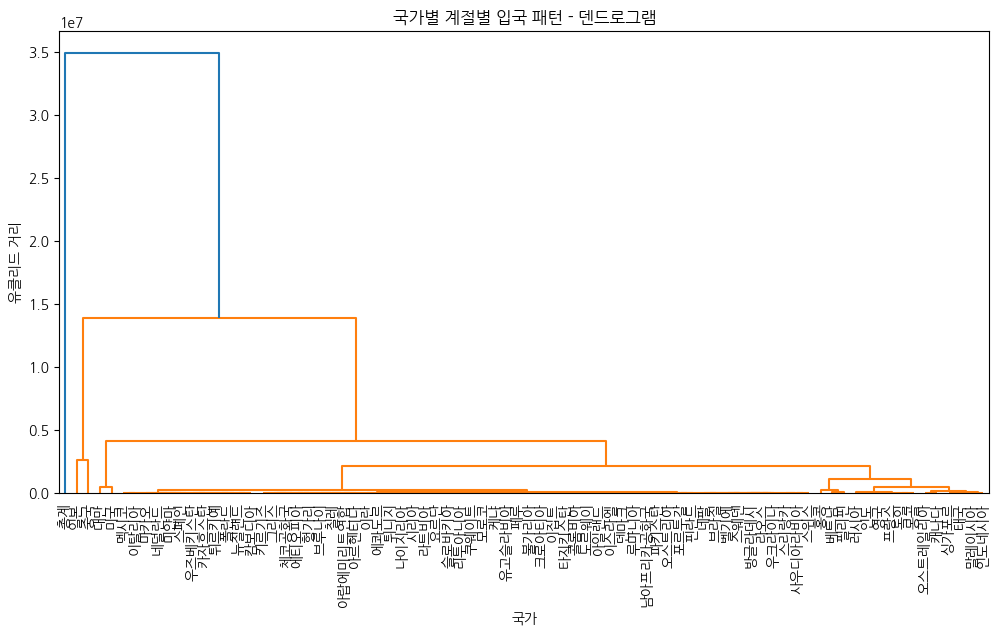

In [56]:
#덴드로그램 확인
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 클러스터링 수행
linkage_matrix = linkage(seasonal_df, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=seasonal_df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('국가별 계절별 입국 패턴 - 덴드로그램')
plt.xlabel('국가')
plt.ylabel('유클리드 거리')
plt.savefig('image/seasonal_dendrogram.png')
plt.show()

In [57]:
# 5개 클러스터가 적절해보임

In [58]:
# 계층적 클러스터링 수행
from scipy.cluster.hierarchy import linkage, fcluster

linkage_matrix = linkage(seasonal_df, method='ward')
num_clusters = 5
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
seasonal_df['클러스터'] = clusters

In [59]:
seasonal_df

계절,가을,겨울,봄,여름,클러스터
국적지역,,,,,
그리스,7687,6658,7507,8051,4
나이지리아,1364,1447,1025,1678,4
남아프리카공화국,11830,11354,11124,12755,4
네덜란드,43772,33398,42065,47566,4
네팔,21484,27121,20390,30945,4
...,...,...,...,...,...
프랑스,140070,105701,136372,140656,4
핀란드,10791,10055,10734,11731,4
필리핀,404779,359889,366033,378967,4


In [60]:
#1번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 1]


계절,가을,겨울,봄,여름,클러스터
국적지역,,,,,
일본,3241509,2655000,2944428,2926100,1


In [61]:
#2번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 2]

계절,가을,겨울,봄,여름,클러스터
국적지역,,,,,
중국,4510109,3972187,4133724,4369862,2


In [62]:
#3번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 3]

계절,가을,겨울,봄,여름,클러스터
국적지역,,,,,
대만,1285939,1137317,1319949,1202872,3
미국,1056241,796179,1039674,1002547,3


In [63]:
#4번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 4]

계절,가을,겨울,봄,여름,클러스터
국적지역,,,,,
그리스,7687,6658,7507,8051,4
나이지리아,1364,1447,1025,1678,4
남아프리카공화국,11830,11354,11124,12755,4
네덜란드,43772,33398,42065,47566,4
네팔,21484,27121,20390,30945,4
...,...,...,...,...,...
프랑스,140070,105701,136372,140656,4
핀란드,10791,10055,10734,11731,4
필리핀,404779,359889,366033,378967,4


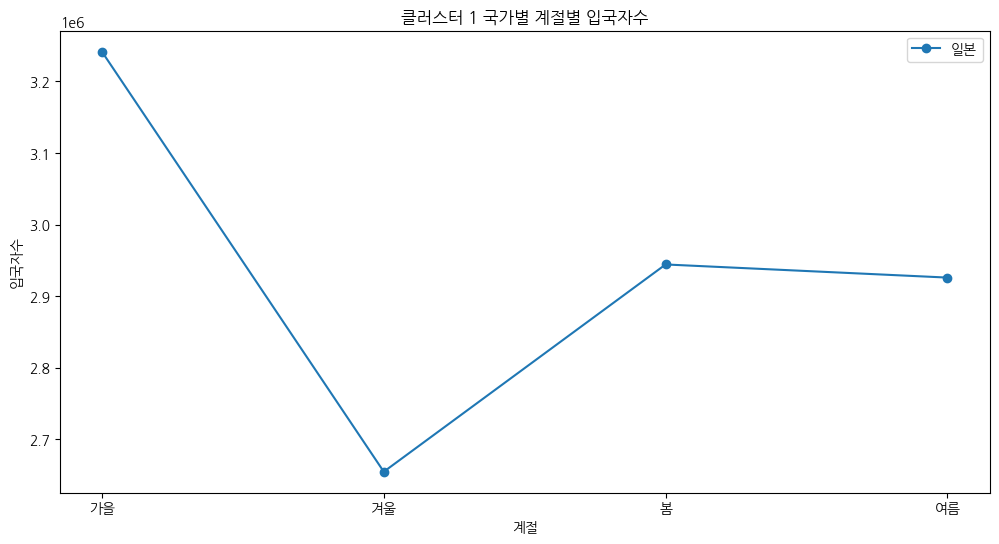

In [65]:
#클러스터별 분석
#클러스터 1
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 1].T.drop('클러스터'), marker='o')
plt.title('클러스터 1 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 1].index)
plt.savefig('image/seasonal_cluster1.png')
plt.show()

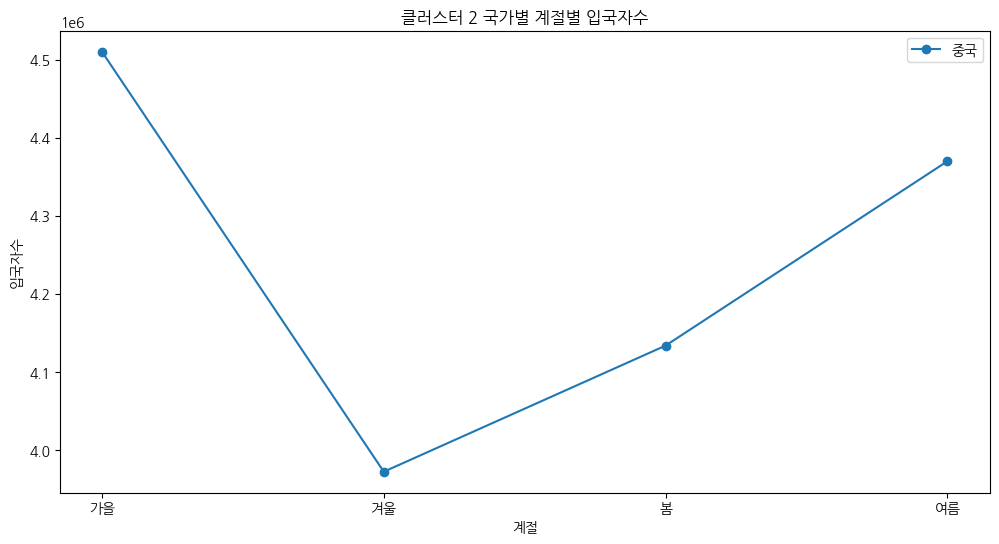

In [66]:
#클러스터 2
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 2].T.drop('클러스터'), marker='o')
plt.title('클러스터 2 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 2].index)
plt.savefig('image/seasonal_cluster2.png')
plt.show()

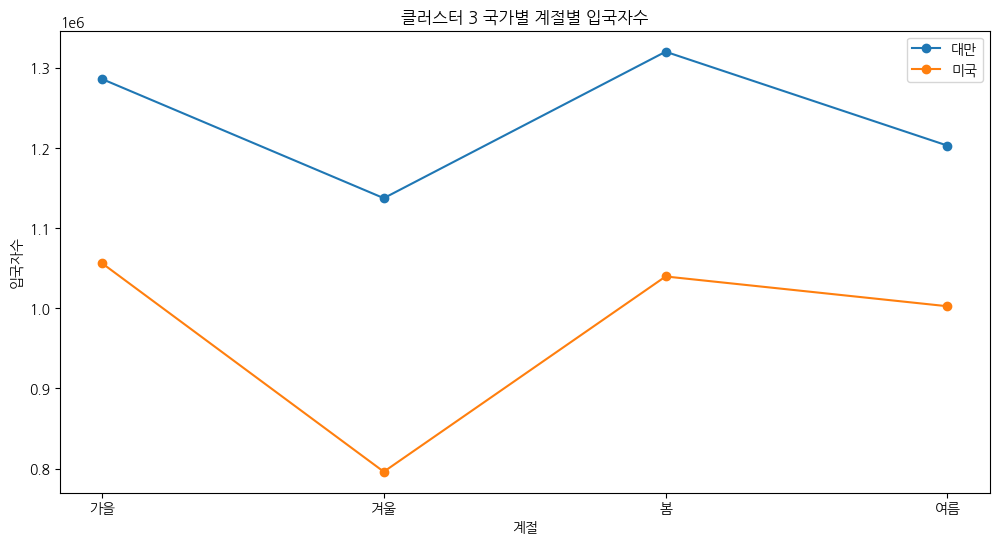

In [67]:
#클러스터 3
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 3].T.drop('클러스터'), marker='o')
plt.title('클러스터 3 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 3].index)
plt.savefig('image/seasonal_cluster3.png')
plt.show()

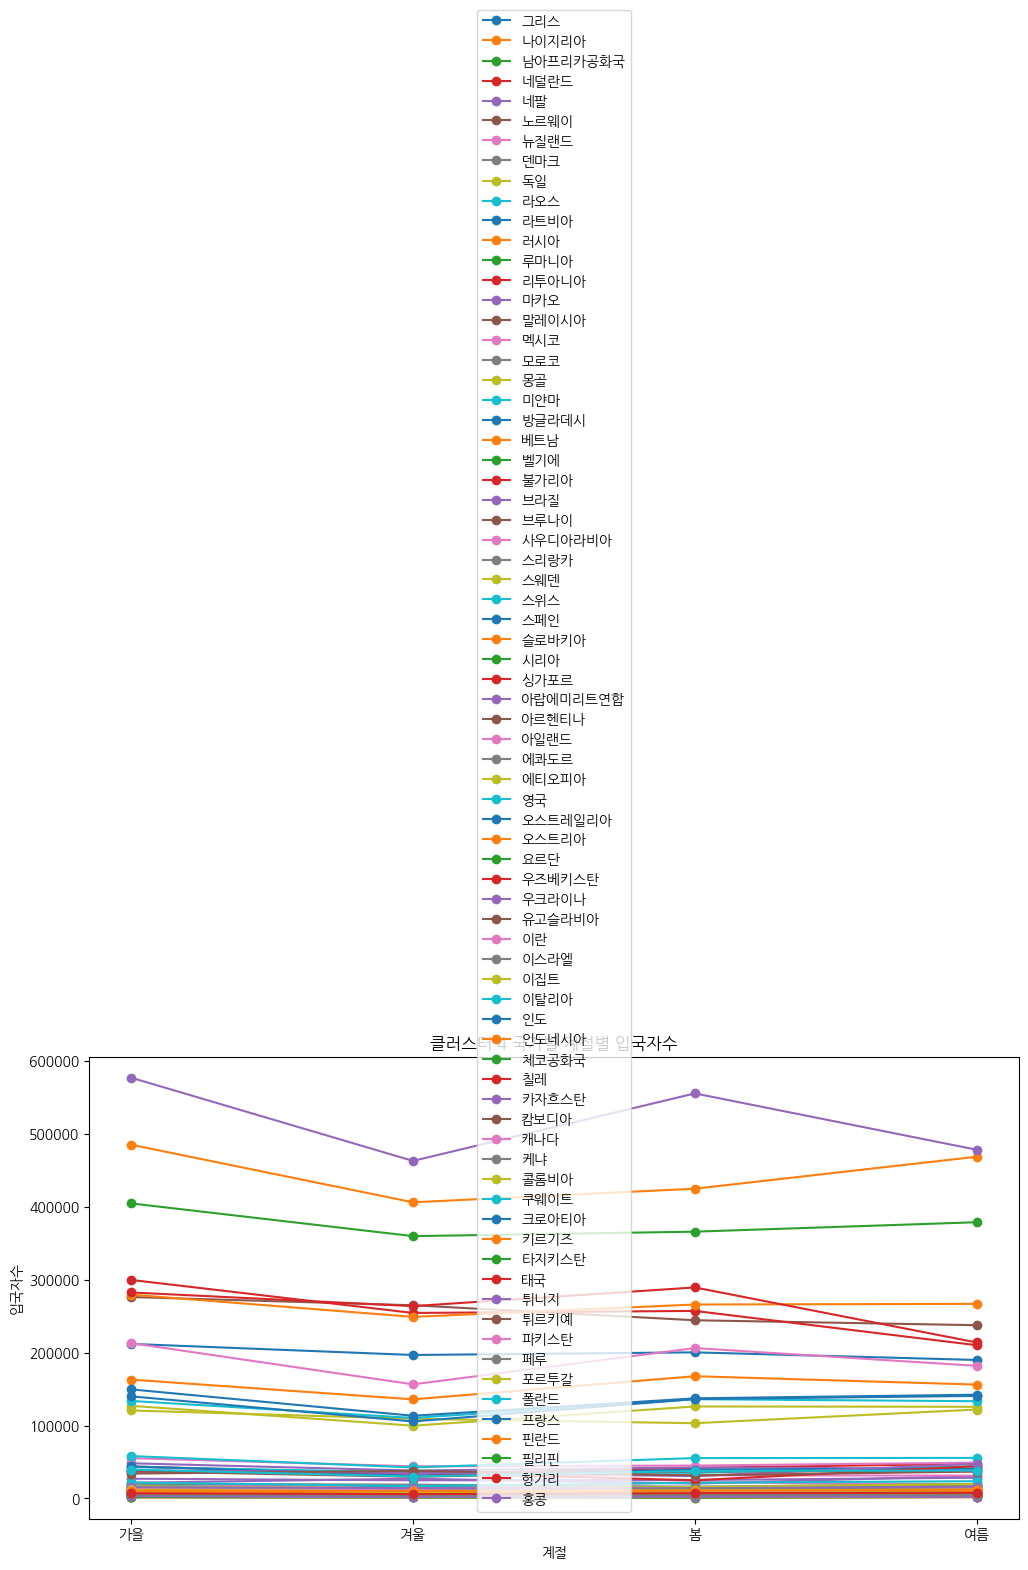

In [69]:
#클러스터 4
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 4].T.drop('클러스터'), marker='o')
plt.title('클러스터 4 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 4].index)
plt.savefig('image/seasonal_cluster4.png')
plt.show()

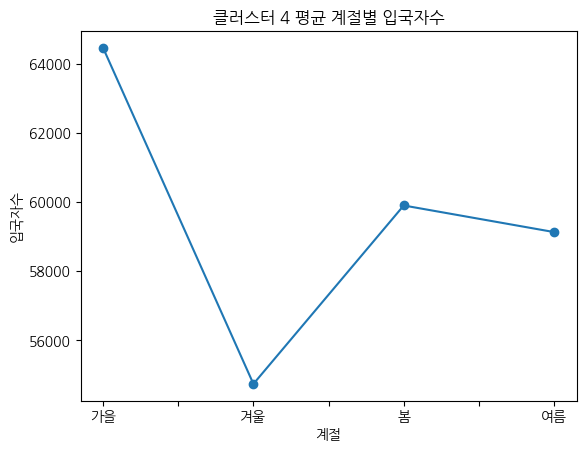

In [ ]:
#클러스터4는 국가가 너무 많아 그래프가 보기 힘들어서 평균값으로 확인
seasonal_df[seasonal_df['클러스터'] == 4].drop(columns=['클러스터']).mean().plot(kind='line', marker='o')
plt.title('클러스터 4 평균 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.savefig('image/seasonal_cluster4_mean.png')
plt.show()

In [ ]:
#과거 데이터도 클러스터링
# 데이터 로드
import pandas as pd
df=pd.read_csv('data/seasonal_df.csv')

In [ ]:
####
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# 데이터 로드
@st.cache_data
def load_data():
    file_path = "/mnt/data/prophet_df.csv"
    df = pd.read_csv(file_path)
    return df

df = load_data()

def get_season(month):
    if month in [3, 4, 5]:
        return "봄"
    elif month in [6, 7, 8]:
        return "여름"
    elif month in [9, 10, 11]:
        return "가을"
    else:
        return "겨울"

# 데이터 전처리
df['연도'] = df['방문년월'].astype(str).str[:4].astype(int)
df['월'] = df['방문년월'].astype(str).str[4:].astype(int)
df['계절'] = df['월'].apply(get_season)

# 국가별 계절별 입국자 수 집계
seasonal_df = df.groupby(['국적지역', '계절'])['입국자수'].sum().unstack(fill_value=0)

# 계층적 클러스터링 수행
linkage_matrix = linkage(seasonal_df, method='ward')
num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
seasonal_df['클러스터'] = clusters

# 스트림릿 앱 구현
st.title("국가별 계절별 입국 패턴 분석")
st.write("이 앱은 국가별 계절별 입국자 수 데이터를 기반으로 클러스터링을 수행합니다.")

# 덴드로그램 시각화
st.subheader("덴드로그램 (Dendrogram)")
fig, ax = plt.subplots(figsize=(12, 6))
dendrogram(linkage_matrix, labels=seasonal_df.index, leaf_rotation=90, leaf_font_size=10, ax=ax)
st.pyplot(fig)

# 클러스터 선택 UI
selected_cluster = st.selectbox("클러스터 선택", sorted(seasonal_df['클러스터'].unique()))
filtered_data = seasonal_df[seasonal_df['클러스터'] == selected_cluster]

st.write("선택한 클러스터에 속한 국가 목록:")
st.dataframe(filtered_data)

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(filtered_data.drop(columns=['클러스터']), cmap='coolwarm', annot=True, fmt='d', ax=ax)
plt.title(f"클러스터 {selected_cluster} 국가별 계절별 입국자수")
st.pyplot(fig)
